# Hospital Costs

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import fitdist as fd

## "Raw" Data

In [3]:
charges = [50406.41, 60060.87, 68791.44, 77883.05, 83401.91, 101281.71, 116124.46]
cost = list(map(lambda x: x / 1000, charges))

freq = [17, 39, 16, 38, 54, 17, 13]

print(f"Cost = {cost}")  # In units of $1000
print(f"Freq = {freq}")

Cost = [50.40641, 60.06087, 68.79144000000001, 77.88305, 83.40191, 101.28171, 116.12446000000001]
Freq = [17, 39, 16, 38, 54, 17, 13]


#### Differences between successive costs (out of curiosity)

In [4]:
print(np.ediff1d(np.array(cost)))

[ 9.65446  8.73057  9.09161  5.51886 17.8798  14.84275]


## Plot of "Raw" Data

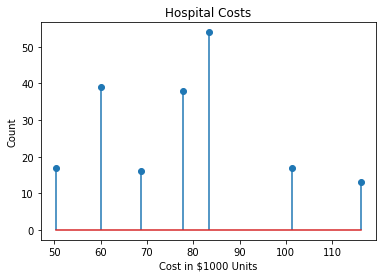

In [5]:
fig, ax = plt.subplots()

ax.set_xlabel('Cost in $1000 Units')
ax.set_ylabel('Count')
ax.set_title('Hospital Costs')
_ = ax.stem(cost, freq)

## Expanded Data

In [6]:
def fill_list(pair):
    "e.g., fill_list((3, 5)) returns [5, 5, 5]"
    return [pair[1]] * pair[0]

In [7]:
pairs = list(zip(freq, cost))
list_of_lists = list(map(fill_list, pairs))
data = list(np.concatenate(list_of_lists).flat)  # flattened list of lists

print(f"{len(data)} Data Points:\n")
print(data)

194 Data Points:

[50.40641, 50.40641, 50.40641, 50.40641, 50.40641, 50.40641, 50.40641, 50.40641, 50.40641, 50.40641, 50.40641, 50.40641, 50.40641, 50.40641, 50.40641, 50.40641, 50.40641, 60.06087, 60.06087, 60.06087, 60.06087, 60.06087, 60.06087, 60.06087, 60.06087, 60.06087, 60.06087, 60.06087, 60.06087, 60.06087, 60.06087, 60.06087, 60.06087, 60.06087, 60.06087, 60.06087, 60.06087, 60.06087, 60.06087, 60.06087, 60.06087, 60.06087, 60.06087, 60.06087, 60.06087, 60.06087, 60.06087, 60.06087, 60.06087, 60.06087, 60.06087, 60.06087, 60.06087, 60.06087, 60.06087, 60.06087, 68.79144000000001, 68.79144000000001, 68.79144000000001, 68.79144000000001, 68.79144000000001, 68.79144000000001, 68.79144000000001, 68.79144000000001, 68.79144000000001, 68.79144000000001, 68.79144000000001, 68.79144000000001, 68.79144000000001, 68.79144000000001, 68.79144000000001, 68.79144000000001, 77.88305, 77.88305, 77.88305, 77.88305, 77.88305, 77.88305, 77.88305, 77.88305, 77.88305, 77.88305, 77.88305, 77.8830

## Find Best Fit Distribution to Expanded Data

In [9]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
# The drop list contains the names of distributions that cause the optimizer to crash, or go into a neverending loop.
drop_list = ['kstwo',
             'levy_stable',
             'studentized_range'
            ]

fd.find_best_fit_distributions(data, dist_names=fd.cont_dist_names, drop_dist_names=drop_list)

[]

<b>NOTE: The empty list, output above, means that no distributions passed the KS Goodness-of-Fit test at a value above the threshold (default 0.10)</b>

See [this comment](https://stackoverflow.com/questions/51604797/error-when-fitting-the-scipy-stats-erlang-distribution) regarding error messages when fitting the Erlang distribution.  Use Gamma distribution instead.